
Note:

- Do not modify or change any hyperparameters or code other than what's blank.
- Focus on completing the missing parts accurately.

In [1]:
#!pip install xgboost

# Step 1 Import Libraries
Context:
- While printing a dataframe to avoid columns being missed out we can use "pd.set_option('display.max_columns', None)". This will display all the columns.

Hints:
1. Import functions to calculate accuracy score, confusion matrix ,roc auc score and classification report from sklearn.metrics 
2. Import relevant function for label encoding from sklearn.preprocessing
3. Import xgboost

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import display
import warnings
pd.set_option('display.max_columns', None)

# Step 2  Load dataset

Hints:
1. Use the read_csv method of pandas to load the csv file

In [3]:
df = pd.read_csv("../data/hotel.csv")

# Step 3 Exploratory Data Analysis (EDA)

## Summary Statistics

Hints:
1. To get summary statistics of the DataFrame (e.g., mean, min, max) for numeric columns, you can use the describe method.

In [4]:
df_summary_numeric=df.describe() 
df_summary_numeric

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Hints:

1. To get summary statistics of the DataFrame (e.g., unique, top, freq) for categorical columns, you can use the describe method with include='object'

In [5]:
df_summary_categorical=df.describe(include='object')
df_summary_categorical

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Null values count in each column of the DataFrame

Hints:
1. Use the isnull method followed by the sum method

In [6]:
null_count = df.isnull().sum()
print(null_count)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Check for duplicate rows and drop them

Hints:
1. Use duplicated method followed by sum method
2. If you find duplicates you can remove them using drop_duplicates method

In [7]:
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)

31994


In [8]:
df = df.drop_duplicates()

In [9]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


# Summary Statistics for continuous numerical columns by target feature categories
Context:
- This analysis helps us understand how the continous numerical columns(adr and lead_time) differ between the two categories(canceled and not canceled) of the target variable.
- By comparing the summary statistics of these variables for canceled and non-canceled bookings separately patterns in cancellations can be identified. For example,canceled booking may have higher lead times.

Hints:
1. Assign the continous numerical columns adr and lead_time to a list columns_to_show
2. Group the data using groupby method based on the target variable is_canceled.

In [10]:
columns_to_show = ["adr", "lead_time"]

summary = df.groupby(["is_canceled"])[columns_to_show].describe(percentiles=[])
display(summary)

adr                                             lead_time  \
               count        mean        std   min    50%     max     count   
is_canceled                                                                  
0            63371.0  102.001961  51.393422 -6.38   94.5   510.0   63371.0   
1            24025.0  117.772476  62.149188  0.00  109.8  5400.0   24025.0   

                                                      
                   mean        std  min   50%    max  
is_canceled                                           
0             70.099588  81.629723  0.0  38.0  737.0  
1            105.719251  91.877339  0.0  80.0  629.0

# Summary tables
Context:
- A summary table is built see how the observations in our sample are distributed in the context of two features.
- Decision trees identify that certain categories are more influential in making a decision,summary tables help us understand such categories 

Hints:
1. Use the crosstab method from pandas library to build a table
2. List two features whose observations we want to summarize. Take categorical variables like is_canceled, distribution_channel

In [11]:
summary_tab = pd.crosstab(df["is_canceled"], df["distribution_channel"])
summary_tab

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
is_canceled,,,,,
0,4433,11063,145,47729,1
1,648,1925,36,21412,4


# Correlation
Context:
- Correlation is a statistical measure that describes the degree to which two variables change together. It quantifies the strength and direction of the linear relationship between two variables.
- Correlation values range from -1 to 1:
    1. Positive correlation (+1): When one variable increases, the other tends to increase.
    2. Negative correlation (-1): When one variable increases, the other tends to decrease.
    3. No correlation (0): There is no linear relationship between the variables
- A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table represents the correlation between two specific variables
- A heatmap is a visual representation of the correlation matrix, it helps to quickly assess the relationships between the variables.

Hints:
1. Calculate the correlation matrix using the corr method
2. We are only concerned with the correlation with respect to the target variable hence access that column alone.
3. As we have many features sort the values in descending to only get top n correlated features.Sort by using sort_values method, for descending sort assign assending = False.
4. Get the top n features from top_correlated_features
5. Plot the heatmap using heatmap method from seaborn library.
6. Set the figure size using figure method
7. Give a relevant title using title method

In [12]:
correlation_matrix = df.corr()
correlation_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,0.067396,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,-0.044359,0.009040,0.004464,0.127986,-0.184206,-0.120545
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028638,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.023698,0.143630,0.132152,0.023564,-0.086541,0.034240
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041137,-0.023334,0.024343,-0.054212,0.027256,0.008604,-0.020110,0.250194,-0.027939,0.176088,-0.039807,0.064268
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013456,0.014260,-0.036860,0.007199,-0.020819,0.011902,0.017685,-0.093838,0.013843,0.098279,0.008946,0.046599
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015807,-0.000393,-0.004178,-0.008538,0.000152,0.006307,0.008830,0.031916,0.006588,0.022591,0.009167,-0.001651
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028558,0.013668,-0.106948,-0.020636,-0.056653,0.050316,0.126838,0.050211,-0.031680,0.038972,-0.042920,0.032396
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030477,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.165014,0.147486,0.001905,0.053298,-0.044303,0.037823
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023721,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,-0.036651,0.216502,-0.015740,0.248999,0.007802,0.112772
children,0.067396,0.028638,0.041137,0.013456,0.015807,0.028558,0.030477,0.023721,1.000000,0.017422,-0.045654,-0.019209,-0.029425,0.031308,0.028050,0.038657,-0.020420,0.326290,0.036328,0.044606
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017422,1.000000,-0.012977,-0.005395,-0.009193,0.081035,0.035219,0.024804,-0.006840,0.023446,0.030885,0.094820


In [13]:
correlation_with_target = abs(correlation_matrix["is_canceled"])
top_correlated_features = correlation_with_target.sort_values(ascending=False)
top_10_features = top_correlated_features[:11]
top_10_features

is_canceled                    1.000000
lead_time                      0.184806
required_car_parking_spaces    0.184206
adr                            0.127986
total_of_special_requests      0.120545
booking_changes                0.093644
is_repeated_guest              0.089643
arrival_date_year              0.088030
stays_in_week_nights           0.082928
adults                         0.081816
children                       0.067396
Name: is_canceled, dtype: float64

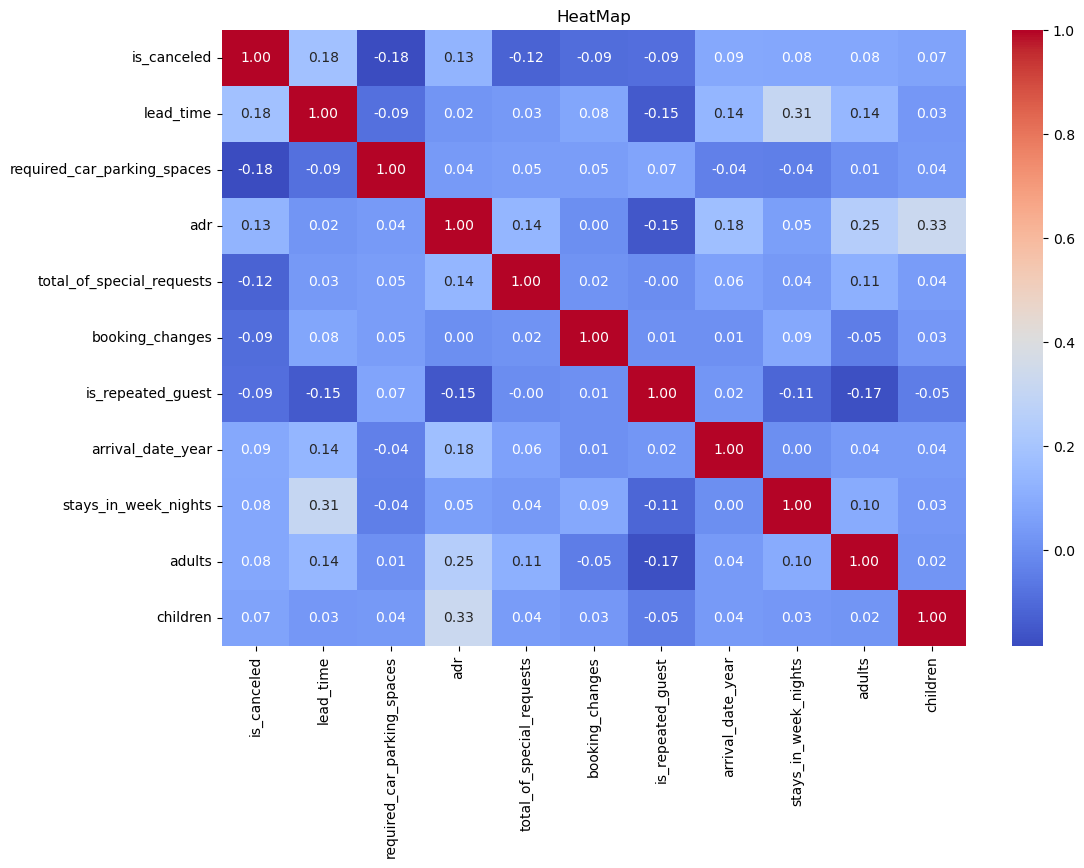

In [14]:
top_10_features_list = top_10_features.index.tolist()
subset_df = df[top_10_features_list]
subset_corr_matrix = subset_df.corr()
plt.figure(figsize=(12, 8))
correlation_heatmap = sns.heatmap(subset_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("HeatMap")
plt.show()


## Check distribution of the target variable
Context:
- In classification problems, understanding the distribution of target variable is important. 
- If one class significantly outweighs the others, we call it class imbalance. 
- Class imbalance can result in model being biased toward the majority class

### For Barchart plotting
Hints:
1. Calculate the count of each category using the column from dataframe followed by value_counts method
2. Use the relevant function from seaborn to plot the barchart
3. Specify the index of the value_counts to plot on the x-axis (like category) and the values of the value_counts on the y-axis(like count of each category)
4. Set the x and y axis labels to describe the data
5. Give the plot an appropriate title describing the data
6. Show the plot with show method from matplotlib.pyplot

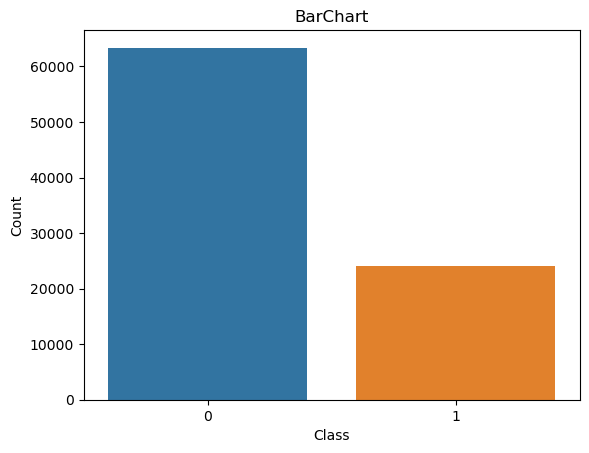

In [15]:

value_counts = df['is_canceled'].value_counts()

cancellation_barplot = sns.barplot(x=value_counts.index, y=value_counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title("BarChart")
plt.show()


# Violin plot of numerical columns across different categories  of the target variable
Context:
- It is used for displaying the distribution of continuous numerical data across different categories of a feature.

Hints:
1. Use violinplot method from seaborn to create the violinplot, pass the x, y and data arguments
2. Use title method from matplotlib.pyplot to add the plot title
3. Call show method from matplotlib.pyplot to display the  plot

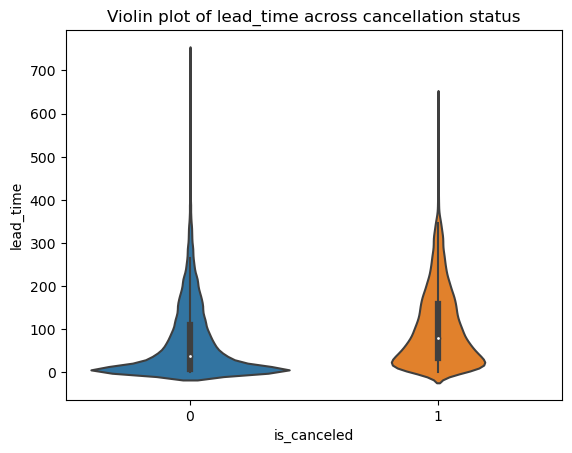

In [16]:
leadtime_violin_plot=sns.violinplot(x='is_canceled', y='lead_time', data=df)
plt.title('Violin plot of lead_time across cancellation status')
plt.show()

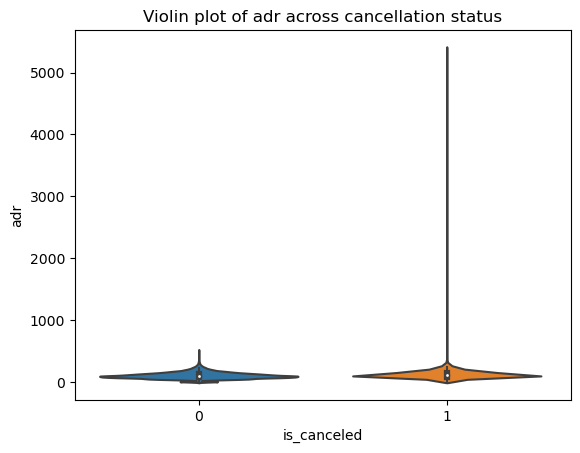

In [17]:
adr_violin_plot=sns.violinplot(x='is_canceled', y='adr', data=df)
plt.title('Violin plot of adr across cancellation status')
plt.show()

# Step 4 : Data cleaning and feature engineering from date column
Context:
### Handling Missing Values
- We identify columns with a high percentage of NULL values. Columns with excessive null values can negatively impact model performance, so we often choose to drop them.
- There is not a single fixed threshold percentage above which a column must be dropped, it depends on various factors.
- If the number of features are very less then every column is very important as dropping it will cause in a huge information loss. In this case the threshold can be a very high percentage.
- If the number of features are high and the concerned feature is not of much importance then the threshold can be a low percentage.
- In our case we can set the threshold to be 50%.

### Imputing Missing Values
- For columns with relatively low percentage of NULL values, we replace the missing entries with appropriate values. This ensures prevention of information loss.
- There are many ways to replace null values like random selection, mean, median, previous value and so on.These can be used for numerical columns.
- For categorical we can replace null by methods like - most frequent category(mode), previous category, new category that does not overlap with any of the existing categories(eg. column agent can be replaced with a number like -1 which has no chance of overlapping with another agent, for country "NA" can be used)

### Columns directly derived or related to target variable
- There are some features which are directly derived from the target variable and using these features will lead to overfitting.
- In our case the column reservation_status is directly related to target column is_canceled. Whenever reservation_status is "canceled" target variable is 0 and when reservation_status is "checked out" target variable is 1.
- This column must be dropped.
- After dropping reservation_status, we don't have any use for reservation_status_date because it was related to the reservation_status. Since we're dropping the status itself, the date doesn't serve any meaningful purpose anymore, so we can drop it too.


Hints:
1. In EDA we had calculated the count of null values in each column,to get the percentage just divide that by length of dataframe.
2. Based on the percentage of null values we can decide whether to drop the column or replace the null values.
3. You can drop the column using drop method
4. If the percentage is less, we can replace the null values using fillna method


In [18]:
null_value_percentage = df.isnull().sum()/df.shape[0]
print(null_value_percentage)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000046
babies                            0.000000
meal                              0.000000
country                           0.005172
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [19]:
df['country'] = df['country'].fillna("NA")
df['agent'] = df['agent'].fillna(-1)

median_value = df['children'].median()
df['children'] = df['children'].fillna(median_value)

In [20]:
columns_to_drop = ['company','reservation_status','arrival_date_week_number','reservation_status_date']
for col in columns_to_drop:
    df = df.drop([col], axis=1)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,-1.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,-1.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,-1.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1


In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Step 5 Removal of outliers
Context:
- An outlier is a data point that significantly deviates from the rest of the data in the column. It can be unusually high or low in value compared to the majority of data points.
- There are many ways to find outliers, one of them is using quartiles.
- Quartiles divide data into four parts. We focus on Q1 (Value below which 25% of the data falls) and Q3 (Value below which 75% of the data falls). 
- The IQR is the range between Q1 and Q3. Outliers are values higher than Q3 + n * IQR. 
- The value of n depends on the data and the goal of our analysis.
- We can go ahead with n = 3
- Replace the outliers with the threshold value

Hints:
1. Remove outliers from continuous numeric columns like lead_time and adr.
2. Use quantile method to find Q1 and Q3. For Q1 use 0.25 as the parameter and for Q3 0.75.
3. Replace the outliers with the threshold value

In [22]:

columns = ['lead_time','adr']
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 +  3 * IQR 
    df[col] = df[col].apply(lambda x: threshold if x > threshold else x)

    

# Step 6 Encoding
Context:
- Encoding is the process of converting categorical data (data that represents categories, labels, or classes) into numerical values, which can be used by machine learning algorithms.
- There are two main types of encoding - one hot encoding and label encoding
- One-hot encoding should be used on columns which have nominal variables i.e. columns where categories are all equally important (eg. Gender- Both the genders male and female are considered equal as there is no hierarchy between them). In our case country can be considered nominal as customer from every country is the same and there is no bias.
- Label encoding should be used on ordinal variables i.e. columns where the categories have a hierarchy (eg. Grades- Grade A is considered to be superior to grade D). In our case room_type can be considered ordinal as AC room has higher hierarchy than normal room.

### Cardinality
- Cardinality indicates how many unique elements are present in an attribute.
- High cardinality is likely to cause dimensionality issues, overfitting, and provide little useful information for both visualization and modeling
- So we recommend dropping it from the analysis
- If the number of features are very less then every column is very important as dropping it will cause in a huge information loss. In this case the threshold can be a very high percentage.
- If the number of features are high and the concerned feature is not of much importance then the threshold can be a low percentage.
- In our case  we can set the threshold to be 30%.
- Dont condider cardinality for continuous numerical columns as they will not be encoded

Hints:
1. To get cardinality use the function nunique method
2. To check if it is high or not you can divide it by the number of rows to get the proportion.
3. One hot encoding can be done using get_dummies method
4. Label encoding can be done using LabelEncoder method
5. Nominal columns to one hot encode: 'arrival_date_year','arrival_date_month','arrival_date_day_of_month','hotel','meal','market_segment','country','distribution_channel','deposit_type','agent','customer_type'
6. Ordinal columns to label encode:'reserved_room_type', 'assigned_room_type' 



In [23]:
unique_counts = df.nunique()
proportion = unique_counts/len(df)
print(proportion)

hotel                             0.000023
is_canceled                       0.000023
lead_time                         0.005023
arrival_date_year                 0.000034
arrival_date_month                0.000137
arrival_date_day_of_month         0.000355
stays_in_weekend_nights           0.000195
stays_in_week_nights              0.000400
adults                            0.000160
children                          0.000057
babies                            0.000057
meal                              0.000057
country                           0.002037
market_segment                    0.000092
distribution_channel              0.000057
is_repeated_guest                 0.000023
previous_cancellations            0.000172
previous_bookings_not_canceled    0.000835
reserved_room_type                0.000114
assigned_room_type                0.000137
booking_changes                   0.000240
deposit_type                      0.000034
agent                             0.003822
days_in_wai

In [24]:
#one hot
nominal_columns = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month','hotel','meal','market_segment','country','distribution_channel','deposit_type','agent','customer_type']
df = pd.get_dummies(df, columns=nominal_columns, prefix=nominal_columns, drop_first=True)
df.head(5)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_day_of_month_5,arrival_date_day_of_month_6,arrival_date_day_of_month_7,arrival_date_day_of_month_8,arrival_date_day_of_month_9,arrival_date_day_of_month_10,arrival_date_day_of_month_11,arrival_date_day_of_month_12,arrival_date_day_of_month_13,arrival_date_day_of_month_14,arrival_date_day_of_month_15,arrival_date_day_of_month_16,arrival_date_day_of_month_17,arrival_date_day_of_month_18,arrival_date_day_of_month_19,arrival_date_day_of_month_20,arrival_date_day_of_month_21,arrival_date_day_of_month_22,arrival_date_day_of_month_23,arrival_date_day_of_month_24,arrival_date_day_of_month_25,arrival_date_day_of_month_26,arrival_date_day_of_month_27,arrival_date_day_of_month_28,arrival_date_day_of_month_29,arrival_date_day_of_month_30,arrival_date_day_of_month_31,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NA,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Re

In [25]:
#label 
ordinal_columns = ['reserved_room_type', 'assigned_room_type']

label_encoder = LabelEncoder()

for column in ordinal_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head(5)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_day_of_month_5,arrival_date_day_of_month_6,arrival_date_day_of_month_7,arrival_date_day_of_month_8,arrival_date_day_of_month_9,arrival_date_day_of_month_10,arrival_date_day_of_month_11,arrival_date_day_of_month_12,arrival_date_day_of_month_13,arrival_date_day_of_month_14,arrival_date_day_of_month_15,arrival_date_day_of_month_16,arrival_date_day_of_month_17,arrival_date_day_of_month_18,arrival_date_day_of_month_19,arrival_date_day_of_month_20,arrival_date_day_of_month_21,arrival_date_day_of_month_22,arrival_date_day_of_month_23,arrival_date_day_of_month_24,arrival_date_day_of_month_25,arrival_date_day_of_month_26,arrival_date_day_of_month_27,arrival_date_day_of_month_28,arrival_date_day_of_month_29,arrival_date_day_of_month_30,arrival_date_day_of_month_31,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NA,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Re

# Step 7 Balancing the dataset
Context:
- Imbalanced Dataset: When one class (like "0" or "not canceled" in our case) significantly outnumbers the other class (like "1" or "canceled"), it's called an imbalanced dataset.
- ML models tend to become biased toward the majority class because they have more data for it.
- Models may not perform well in predicting the minority class, in this case accuracy can be misleading because a model might predict the majority class most of the time and still achieve high accuracy.

### Balancing the dataset
- There are two ways in which a dataset can be made balanced- Oversampling and Undersampling
- Oversampling duplicates or creates new synthetic rows in the minority class.
- Undersampling deletes or merges examples in the majority class.
- Either undersampling or oversampling can be done when the difference between the count of minority and majority class is less. But if the difference is high oversampling will lead to too much redundant data and undersampling will lead to huge loss of data.
- In our case as the difference between the two classes is high we calculate the average count of the two classes and oversample the minority class to the average value followed by undersampling the majority class to the average value.

### Methods to over and under sample
- Methods like Random Sampling and SMOTE can be used.
- Random sampling involves randomly duplicating samples from the minority class or randomly deleting samples from the majority class. It is simple but it may lead to overfitting during oversampling as it adds duplicate data
- SMOTE creates synthetic samples by interpolating between existing minority class samples. It addresses the overfitting issue associated with random oversampling and can help avoid model bias.
- Choose SMOTE for oversampling as it prevents model bias.
- Choose Random sampling for undersampling as we are only removing data and hence it will not lead to duplicate data.

Hints:
1. Create feature matrix X by dropping the target variable ("is_canceled") from the DataFrame df.
2. Create a target vector y by selecting the target variable ("is_canceled") from the DataFrame df.
3. Calculate the count of each category using target vector y followed by value_counts method
4. Assign zeroth index of value_counts to variable count_0 which holds the number of 0s.
5. Assign first index value_counts to variable count_1 which holds the number of 1s.
5. Calculate average using the variables count_0 and count_1.
6. Create a resampling pipeline where we first oversample category 1 to the average_count and then undersample category 0 to the average_count
7. Fit and transform the data using the resampling pipeline and fit_sample method.
8. Assign the resampled X and y values to feature matrix X and target variable y.
9. Create a new dataframe df_resampled and initialize it by concatenating X and y using concat method.

In [26]:
X = df.drop(['is_canceled'], axis=1)   
y = df['is_canceled']

count_0 = y.value_counts()[0]
count_1 = y.value_counts()[1]
average_count = int((count_1+count_0) / 2)


resampling_pipeline = Pipeline([
    ('oversampler', SMOTE(sampling_strategy={1: average_count})),
    ('undersampler', RandomUnderSampler(sampling_strategy={0: average_count}))
])


X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

X,y =X_resampled, y_resampled
df_resampled = pd.concat([X,y],axis=1)
df_resampled.head(5)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_day_of_month_5,arrival_date_day_of_month_6,arrival_date_day_of_month_7,arrival_date_day_of_month_8,arrival_date_day_of_month_9,arrival_date_day_of_month_10,arrival_date_day_of_month_11,arrival_date_day_of_month_12,arrival_date_day_of_month_13,arrival_date_day_of_month_14,arrival_date_day_of_month_15,arrival_date_day_of_month_16,arrival_date_day_of_month_17,arrival_date_day_of_month_18,arrival_date_day_of_month_19,arrival_date_day_of_month_20,arrival_date_day_of_month_21,arrival_date_day_of_month_22,arrival_date_day_of_month_23,arrival_date_day_of_month_24,arrival_date_day_of_month_25,arrival_date_day_of_month_26,arrival_date_day_of_month_27,arrival_date_day_of_month_28,arrival_date_day_of_month_29,arrival_date_day_of_month_30,arrival_date_day_of_month_31,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NA,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,age

# Step 8 Transformation
Context:
- Some ML models like linear and logistic regression assume that the variables are normally distributed.
- Their accuracy would be affected if the variables are not normally distributed hence we perform transformation.
- Models like naive bayes, decision trees do not work on this assumption hence it is not necessary to transform the data
- But still it can be tried to see if it makes any changes in the model accuracy
- There are many ways to transform like : log transformation, reciprocal transformation, square root transformation,exponential transformation, boxcox transformation.

### Skewness
- The type of transformation to be used is dependent on the skewness of the data.
- Skewness is a measure of how symmetric data is. Symmetric data(eg normal distribution) has zero skewness.
- Positive skewness(Right skew): It has skewness value > 0. The distribution is concentrated on the left.
- Negative skewness(Left skew): It has skewness value < 0. The distribution is concentrated on the right.

### Transformations
- Log Transformation: Use when data is right-skewed
- Reciprocal Transformation: Appropriate for left-skewed data 
- Square Root Transformation: Useful for reducing the impact of outliers in right-skewed data.
- Exponential Transformation: Useful for making left-skewed data more symmetric.
- Box-Cox Transformation: Versatile; it finds the best transformation (including log, square root, etc.) for your data to minimize skewness.

Hints:
1. To check if the data is skewed you can calculate skew using the relevant function from stats library.
2. Right skewed data(skewness>0) can be transformed using np.log() and passing the column that we want to transform, the column has to be continuous numerical column
3. To see the change in distribution before and after the trasnformation we can compare the histograms 

Hints(for plotting histogram):
1. Use the relevant function from seaborn to plot the histogram
2. For the dataframe, use the dataframe variable containing your data
3. Specify the column to plot on the x-axis 
4. Pick a color for the histogram like 'skyblue'
5. Set the number of bins
6. Give the plot an appropriate title describing the data
7. Set the x and y axis labels to describe the data
8. Show the plot with show method from matplotlib.pyplot
9. As there are many columns that are numerical we can use a for loop to loop through them.

Skew of lead_time :  1.2824545854732854
Skew of adr :  0.8057262159073064


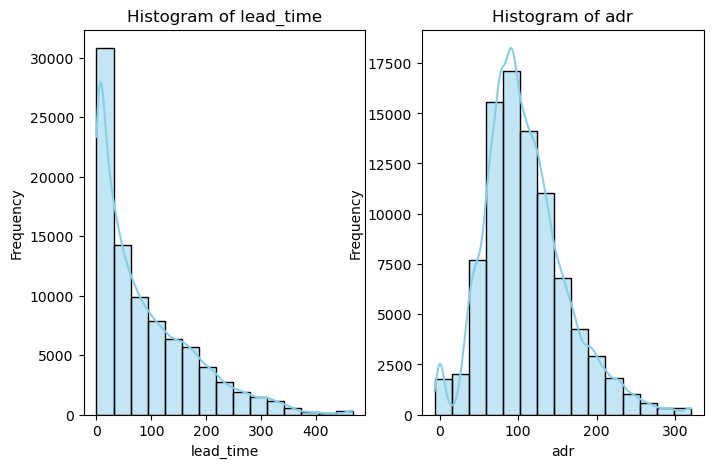

In [27]:
numerical_columns = ['lead_time','adr']
i = 1
fig = plt.figure(figsize=(8, 5))
for column in numerical_columns:
    column_data = df_resampled[column]
    skewness = stats.skew(column_data)
    print(f"Skew of {column} : ",skewness)
    plt.subplot(1, 2, i)
    sns.histplot(df_resampled, x=column, kde=True, color='skyblue', bins=15)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    i = i+1


/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


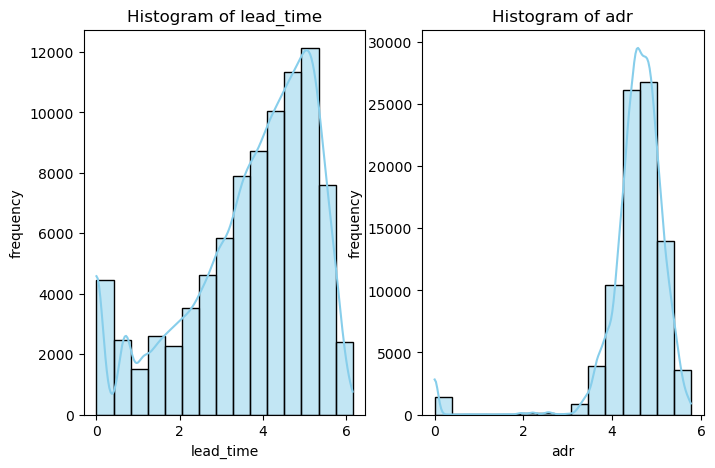

In [28]:
transformed_df = pd.DataFrame()

i = 1
fig2 = plt.figure(figsize=(8,5))
for column in numerical_columns:
    transformed_df[column]=np.log(df_resampled[column]+1)
    column_data = transformed_df[column]
    skewness = stats.skew(column_data)
    plt.subplot(1, 2, i)
    sns.histplot(transformed_df, x=column, kde=True, color='skyblue', bins=15)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel("frequency")
    i = i+1

# Step 9 Scaling
Context:
- Scaling is required in machine learning to ensure that features with different units or scales do not dominate the learning process
- Scaling for a decision tree model is typically unnecessary and may not have a significant impact on the model's performance but it can have huge impact on linear models.
- It is not necessary to apply standardization to categorical features, so we can create a list numerical_features that contains the list of all numerical columns and apply standardization only to them.

Hints:
1. Create a scaler object using MinMaxScaler()
2. Loop through the numerical_columns list to fit and transform the numerical columns using the functions fit_transform()
3. After getting the scaled data use it to replace the original data in the numerical columns

In [29]:

scaler = MinMaxScaler()
numerical_columns = ['lead_time','adr']
for col in numerical_columns:
    numerical_data = transformed_df[col].values.reshape(-1, 1)
    X_scaled = scaler.fit_transform(numerical_data)
    transformed_df[col] = X_scaled
transformed_df.head(5)

,lead_time,adr
712,0.603983,0.831809
65756,0.389999,0.886779
61567,0.178681,0.876080
36854,0.747360,0.750373
31724,0.389999,0.905449


# XGBoost classifier
- XGBoost, short for Extreme Gradient Boosting, is a powerful machine learning algorithm used for classification 
- Just like random forest xgboost is also a ensemble method.
- Random Forest builds multiple Decision Trees in parallel and the result is obtained by taking a majority vote
- Whereas XGBoost builds a sequence of Decision Trees serially.Each new tree corrects the errors made by the previous ones.









# Step 10 Split data into train and test sets

1. Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_train.shape)

X_train shape: (69916, 590)
X_test shape: (17480, 590)
y_train shape: (69916,)
y_test shape: (69916,)


# Step 11  Train the XGBoost model

Hints:
1. Create a XGBClassifier object using XGBClassifier()
2. Train the model by fitting it to the training data. Use the fit method and provide X_train (training features) and y_train (training labels) as input.
3. Make predictions on the test data using the trained model. Use the predict method with X_test as input to generate y_pred.

In [31]:
xgb_model = xgb.XGBClassifier()  
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Step 12 Evaluate the model using the performance metrics
- The ROC AUC score of the best model > 0.8

Hints:
1. Get the evaluation by comparing y_pred and y_test with the use of accuracy_score() and classification_report()
2. Get the roc_auc score by comparing y_test and y_prob using roc_auc_score()

In [32]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8724
           1       0.85      0.87      0.86      8756

    accuracy                           0.86     17480
   macro avg       0.86      0.86      0.86     17480
weighted avg       0.86      0.86      0.86     17480

ROC AUC: 0.86


# Step 13 Visualize the feature importances
Context:
- Visualizing the feature importances helps in understanding the significant factors that impact our machine learning model's predictions. By identifying these influential features, you gain insights into which aspects of your data are most relevant for making accurate predictions. 
- With the help of feature importance irrelevant features can be removed which would make the model simpler

Hints:
1. Get the feature names in the dataframe using columns method
2. Calculate feature importance using feature_importances_ method on the trained xgboost model.
3. Sort feature_importances in descending order using argsort method
4. As we have many features displaying all of them will be confusing hence 15 features are chosen.
5. Plot the feature importances in the form of bar plot
6. Use bar method from matplotlib.pyplot 
7. Use show method to display the plot

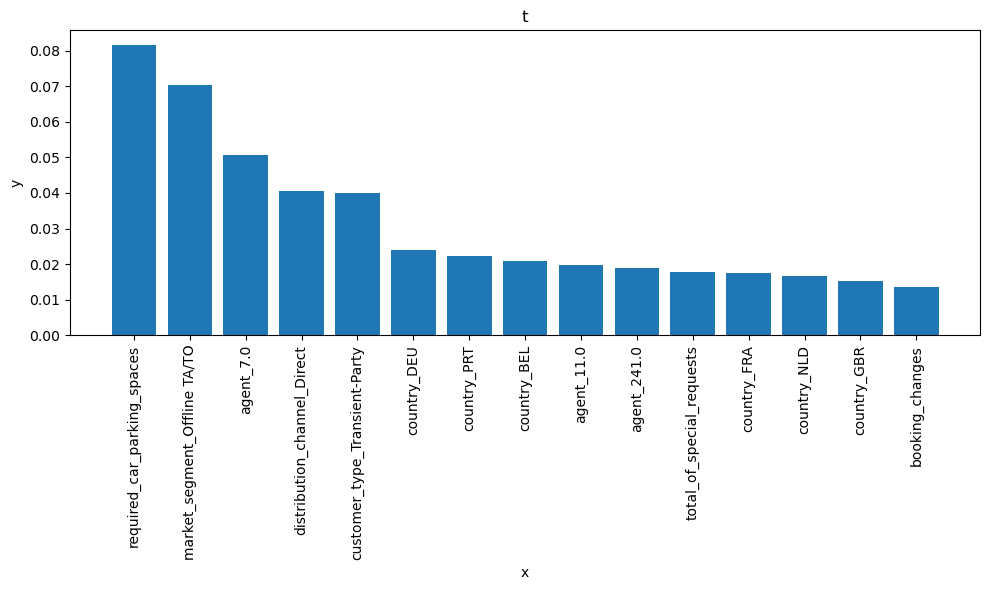

In [33]:

feature_names = X_train.columns

feature_importances = xgb_model.feature_importances_

sorted_idx = feature_importances.argsort()[::-1]

top_n = 15
top_features = feature_importances[sorted_idx][:top_n]
top_feature_names = [feature_names[i] for i in sorted_idx][:top_n]


plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_features)
plt.xticks(range(top_n), top_feature_names, rotation=90)
plt.xlabel('x')
plt.ylabel('y')
plt.title('t')
plt.tight_layout()
plt.show()

# Step 14 Comparison with transformed dataframe
Context:
- As transformation of columns is not required for models like XGBoost, compare the results of actual df and tranformed df. Ideally the results should be similar in both the cases.

Hints:
1. Replace the numeric columns in the dataframe with their transformed versions
2. Now train the model again and check the ROC AUC score


In [34]:
numerical_columns = ['adr','lead_time']
for column in numerical_columns:
    df_resampled[column] = transformed_df[column]

In [35]:
df_resampled.isnull().sum()

lead_time                        0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         0
                                ..
agent_535.0                      0
customer_type_Group              0
customer_type_Transient          0
customer_type_Transient-Party    0
is_canceled                      0
Length: 591, dtype: int64

In [36]:
df_resampled['adr'] = df_resampled['adr'].fillna(0)
X = df_resampled.drop(['is_canceled'], axis=1)   
y = df_resampled['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8724
           1       0.85      0.87      0.86      8756

    accuracy                           0.86     17480
   macro avg       0.86      0.86      0.86     17480
weighted avg       0.86      0.86      0.86     17480

ROC AUC: 0.86


# Conclusion
-  As discussed earlier decision tree does not assume that the data follows a normal distribution or require the data to be scaled. This can be verified by comparing the results of the model on the original and transformed dataset